# Exercise 03 : Bar charts

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## What if the average number of commits is different when it is a working day or weekend?

array([<Axes: title={'center': 'Weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'Working Day'}, xlabel='hour'>],
      dtype=object)

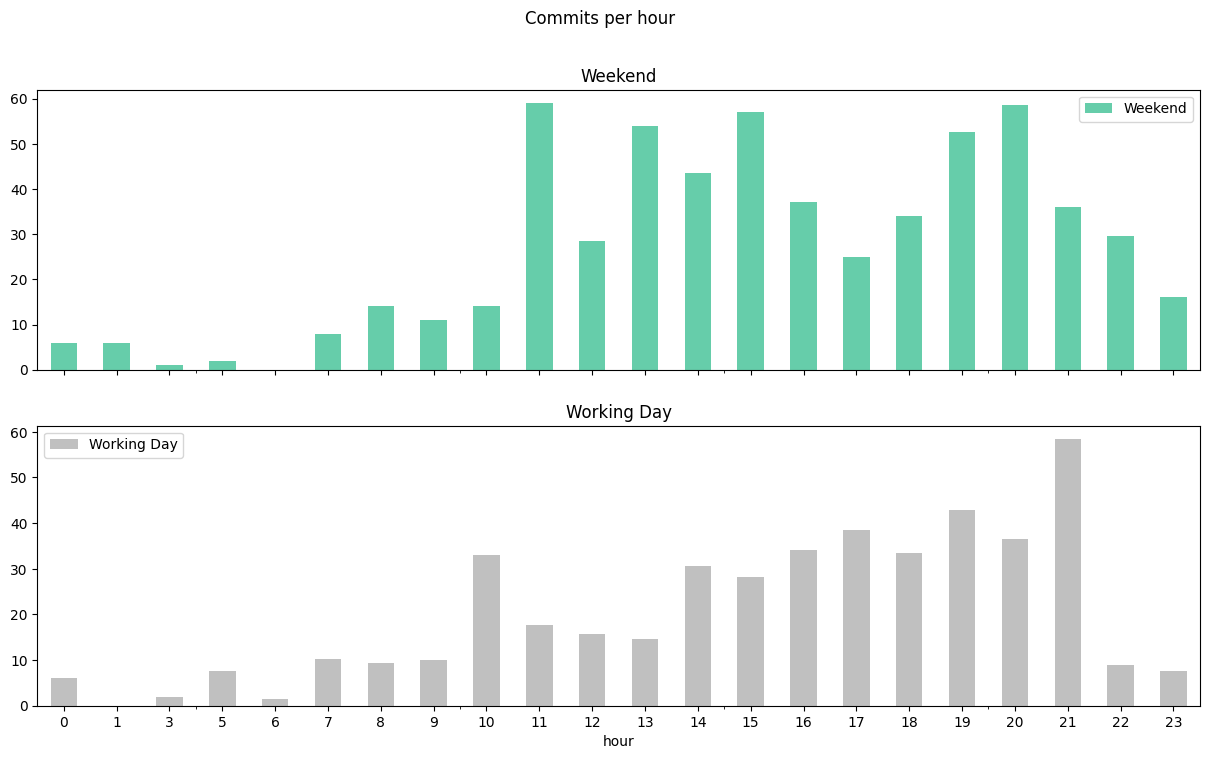

In [3]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day_of_week'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour

commits_per_hour = df.groupby(['day_of_week', 'hour']).size()
weekend = commits_per_hour.loc[['Saturday', 'Sunday']].groupby('hour').mean()
working_day = commits_per_hour.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].groupby('hour').mean()

commits_per_hour = pd.DataFrame({'Weekend': weekend, 'Working Day': working_day})
colors = ['mediumaquamarine', 'silver']

commits_per_hour.plot.bar(subplots=True, figsize=(15, 8), title='Commits per hour', color=colors, rot=0)

In [4]:
conn.close()

## Is the dynamic different on working days and weekends?

During weekends, the largest number of commits occurs at 11, indicating that users tend to commit code more actively around midday on weekends. During working days, the peak commit hour is at 21, suggesting that users are more active in committing code later in the evening on working days. This difference in peak commit hours suggests that the dynamic of commits varies between working days and weekends.